# Guide

In a nutshell, this tool consits of three classes:
* `WordVertex` class represents the word and it grammatical information, 
* `SentenceGraph` class represents the sentenceas graph where vertices are `WordVertex` class instances,
* `TextParser` class that maintain UDPipe model in memory and can produce SentenceGraph instances from the text.

So let's study this tool. First of all, let's import the parser and define some text.

In [1]:
from sentence_graph import TextParser

In [2]:
text = '''В современном интернете, где все острее встает вопрос обеспечения анонимности, 
многие люди начинают задумываться о том, какие инструменты для этого им использовать. 
Здесь часто возникает путаница, поскольку не все разбираются в аспектах существующих технологий. 
А их огромное количество, и даже решение одной и той же задачи сокрытия реального IP-адреса может быть реализовано по-разному.'''


Now, we need to give a path to UDpipe model to the parser. For my experiment it will be Russian model but any other language is suitible. 

In [3]:
parser= TextParser('../models/rus_model.udpipe')

Having defined the parser, we can use it multiple times on different texts without reloading the model.

In [4]:
sents = parser.parse(text)

Conllu parsing: 100%|██████████| 3/3 [00:00<00:00, 4607.44it/s]


Lets look at amount of sentences and how the sents looks like.

In [5]:
len(sents)

3

In [6]:
print(sents)

[root В современном интернете , ...<SentenceGraph>, root Здесь часто возникает путаница ...<SentenceGraph>, root А их огромное количество ...<SentenceGraph>]


You can see the 'root' at the begining of each sentence. This token explicitly represents the root node defined by ConLLU format. 

You can loot at an entire graph of the sentence. The vertices can be labeled either by id, pos tag, lemma, form and case, the default value is form. Let's take the firsrt sentence and build its graph with form labels. You can also give the figure size parametrs in a tuple just like in matplotlib. The default value is (16, 10).

Sometimes graph picture is generated quite poorly. Just regenerate it one more time or try to change the figure size.

In [7]:
sentence = sents[0]

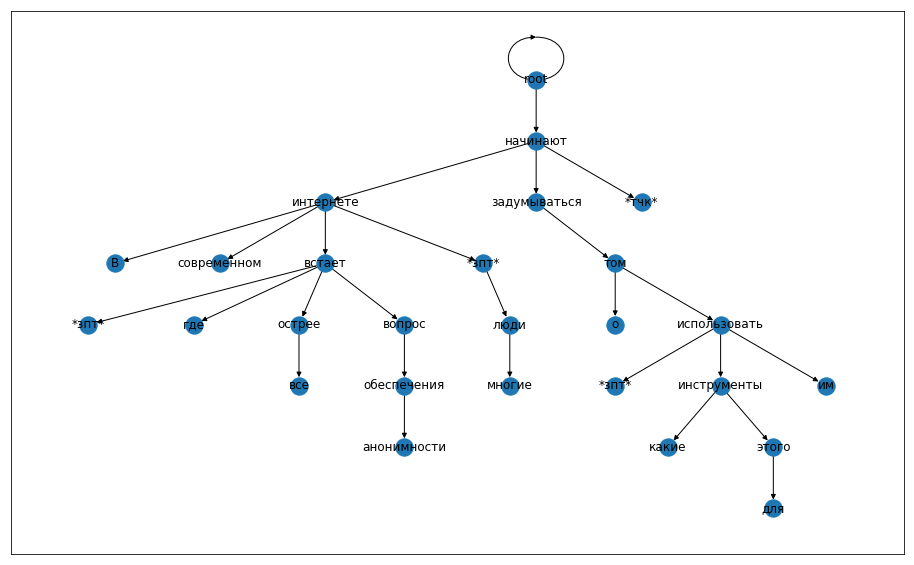

In [8]:
sentence.plot(property="form")

Moving next, you can get the certain word and its information in two ways. First, it is a search directly by a word using `search_by_word` function, second way is to pick it up by id in `SentenceGraph` instance that is represented as a list actually.

Note that due to the word might be included in the sentence several times, `search_by_word` funcion returns the list.

About grammatical infromation that you can get about the word. There are next attributes:
* id - ID of a word in CoNLLU file
* lemma - Lemma or stem of a word
* head -  ID of a word's head 
* hlink - Word instance of head word
* pos - Universal part-of-speech tag
* head_link_attr - Universal dependency relation to the HEAD
* children - List of children `WordVertex` instances of a current word
* form - A word as is
* morpho - List of morphological features

See [format information](https://universaldependencies.org/format.html) to learn more.

So, for example, let's print some attributes using two ways of obtaining word.

In [9]:
word = sentence.search_by_word('интернете')[0]
print(word['wid'], word['form'], word['lemma'], word['pos'])

3 интернете интернет NOUN


In [10]:
word = sentence[3]
print(word['wid'], word['form'], word['lemma'], word['pos'])

3 интернете интернет NOUN


Now, some example with parents and children. As written above, for the head word you can just call **hlink attribute**. It is always the `WordVertex` instance beacuse in conllu format the word can have only one head. However, several children is allowed so the **children** attribute is represented as a list of `WordVertex` instances.

In [11]:
head_word = word['hlink']
print(head_word['wid'], head_word['form'], head_word['lemma'], head_word['pos'])

15 начинают начинать VERB


In [12]:
print(word['children'])

[В_WID-1<WordVertex>, современном_WID-2<WordVertex>, встает_WID-8<WordVertex>, ,_WID-12<WordVertex>]


The constructed graph has a functionality to get separated clauses of complex sentences. Of course, it depends on accuracy of syntax parsing and some times produces errors, but, in general, it works pretty good. Below you can see, for example, two wrong and one right splitting.

In [13]:
sentence.get_clauses()

['В современном интернете начинают',
 ', где все острее встает вопрос обеспечения анонимности , многие люди задумываться о том , какие инструменты для этого им использовать .']

In [14]:
sents[1].get_clauses()

['Здесь часто возникает путаница',
 ', поскольку не все разбираются в аспектах существующих технологий .']

In [15]:
sents[2].get_clauses()

['А их огромное количество , и даже решение одной и той же задачи сокрытия реального IP-адреса может быть реализовано по-разному .']

That's all so far. I hope you enjoied this tutorial.